# Task 5 : To Explore Business Analytics ( EDA)
## By Jagriti Sahi

In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data set 
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\JAGRITI\GRIP\SampleSuperstore.csv' , encoding = 'latin')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


So, we have 9994 samples data of superstore with average profit of 28.6/- and average sale price - 229.85/- 

In [5]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing value in our data

### Reading different Features

In [6]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

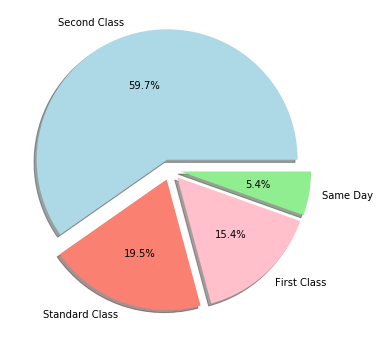

In [7]:
plt.figure(figsize = (6,6))
plot_shipmode = data['Ship Mode'].value_counts()
colors = ('LightBlue' , 'Salmon' , 'pink' , 'LightGreen')
label = data['Ship Mode'].unique()

plt.pie(plot_shipmode, 
       autopct = '%1.1f%%',
       explode = (0.08,0.08,0.08,0.08),
       shadow = True,
       colors = colors,
       labels = label);

Second class is most preferred shipping Mode 

In [8]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

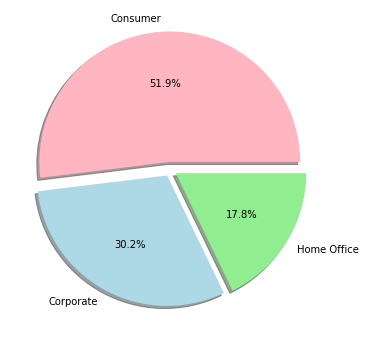

In [9]:
plt.figure(figsize = (6,6))
segment = data['Segment'].value_counts()
segment_label = data['Segment'].unique()
color = ('LightPink', "LightBlue" , 'LightGreen')

plt.pie(segment,
       autopct = '%1.1f%%',
       labels = segment_label,
       explode = (0.06,0.05,0.05),
       shadow = True,
       colors = color);

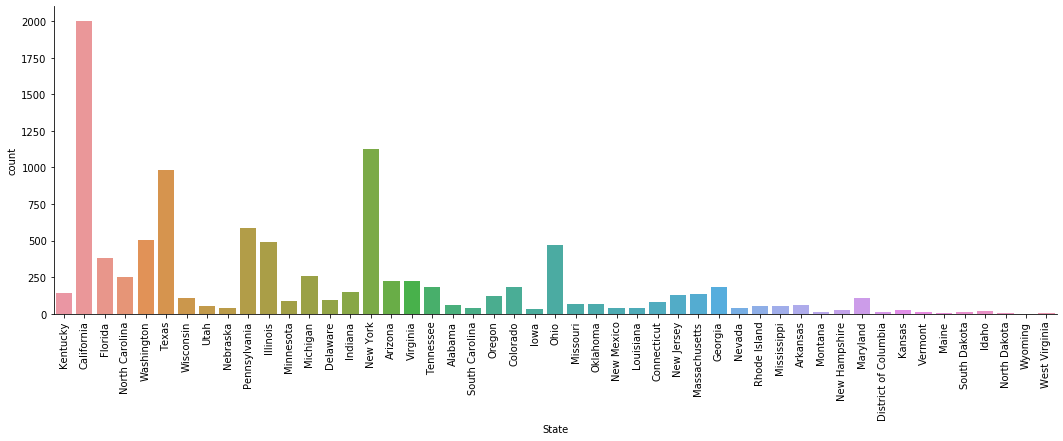

In [10]:
sns.catplot(data = data , x = 'State' , aspect = 3 , kind = 'count')
plt.xticks(rotation = 90);

california has most of the customers of the given superstore 

In [11]:
california =data[data['State'] == 'California']
new_york = data[data['State'] == 'New York']
california.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.86,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.28,4,0.0,1.9656


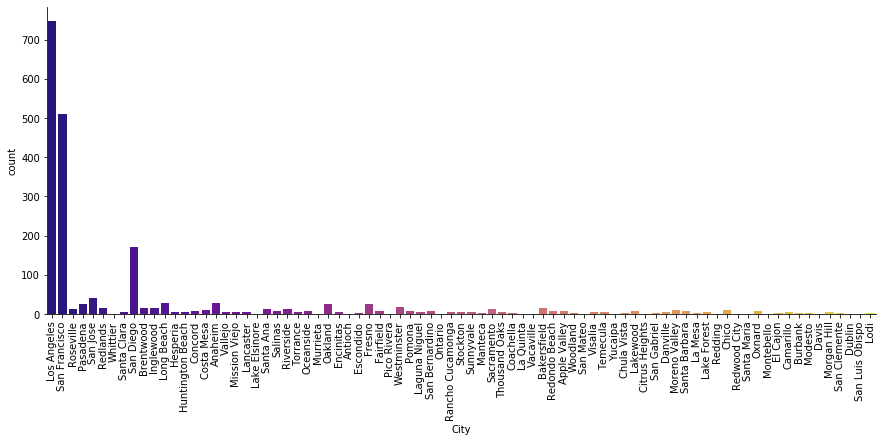

In [12]:
sns.catplot(x = 'City' , data = california , kind = 'count' , aspect = 2.5, palette = 'plasma');
plt.xticks(rotation = 90);

In California most of the customers are from `Los Angeles`

In [13]:
data['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Iowa City            1
Champaign            1
Margate              1
Rochester Hills      1
Whittier             1
Name: City, Length: 531, dtype: int64

Overall our maximum customers are from `New York City`.
* **We can say `California` and `New York` plays important role in total sales of superstore.**
* let's checkout the profit from both States.

In [14]:
california["Profit"].sum(), new_york['Profit'].sum()

(76381.3871, 74038.54860000001)

 net sales and profit from `California` is more than `New York` and other states.

In [15]:
#let's dig furhter to find out purchasing pattern of New York .
california.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825


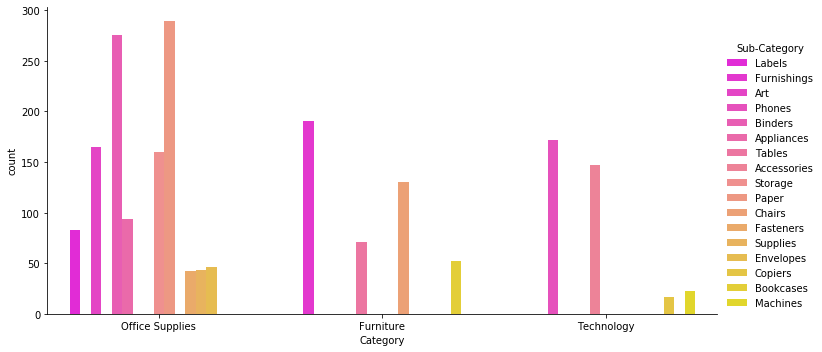

In [17]:
sns.catplot(x ='Category' , hue = "Sub-Category" , data = california , kind = 'count', palette = 'spring', aspect = 2);

Being a Economic centre most of the sales of California are `Office Supplies`.

## General Impact of different features on Profit.

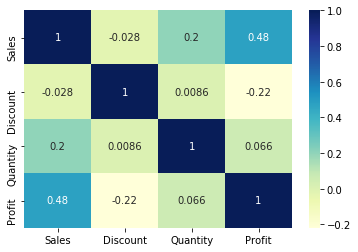

In [18]:
corr = data[['Sales' , 'Discount' , 'Quantity' , 'Profit']].corr()
sns.heatmap(corr, annot = True , cmap = 'YlGnBu')

* fairly good correlation can be observed between sales and profit , implying higher sales will give us higher profit .
* Negative correlation between profit and Discount  indicates that Discounts are not good for profit.
* Also , correlation between Sales and Dsicount is negative ,indicating Higher the sale amount lower will be discount offered on it.

<BarContainer object of 9994 artists>

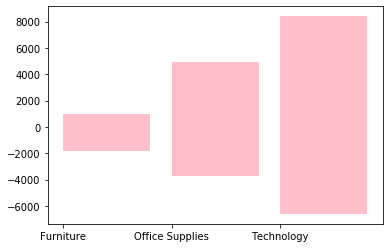

In [19]:
plt.bar( data['Category'],data['Profit'] , align = 'edge' , color = 'pink' )

<BarContainer object of 9994 artists>

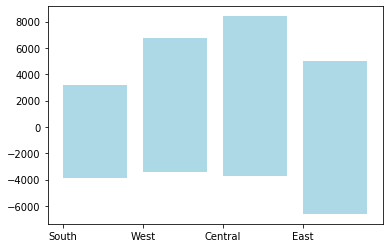

In [20]:
plt.bar(data['Region'], data['Profit'] , color = 'LightBlue', align = 'edge')

Owner needs to focus on **Eastern Region** as lower profit and higher loss is observed from this region.

In [21]:
data['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

In [22]:
quantity_plot = data.groupby('Quantity').mean().reset_index()
quantity_plot

,Quantity,Postal Code,Sales,Discount,Profit
0,1,53740.661846,59.234632,0.152959,8.276396
1,2,55136.025396,120.354488,0.154858,16.006831
2,3,54924.250311,175.201578,0.153329,23.667715
3,4,54862.481948,271.764059,0.157708,37.131310
4,5,56694.857724,337.936339,0.157146,40.257394
5,6,55051.805944,362.101960,0.166556,18.051517
6,7,55723.661716,395.888393,0.161980,56.579163
7,8,56692.369650,458.210802,0.171595,42.244342
8,9,54736.406977,498.083683,0.147946,68.557716
9,10,55343.105263,422.046737,0.190702,35.862404


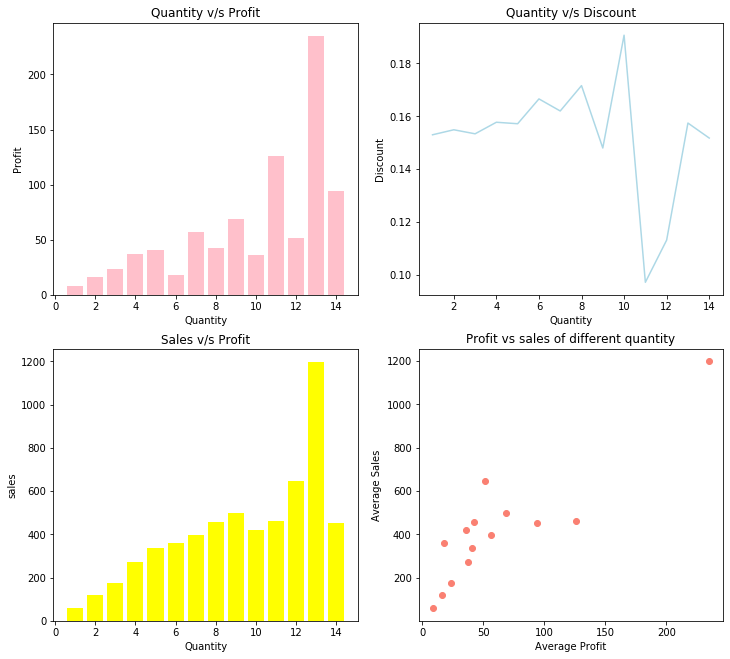

In [23]:
fig,ax = plt.subplots(figsize = (12,11),
                     nrows = 2,
                     ncols = 2)
ax[0,0].bar(quantity_plot["Quantity"] , quantity_plot['Profit'] , color = 'pink')
ax[0,1].plot(quantity_plot['Quantity'], quantity_plot['Discount'] , color = 'LightBlue')
ax[1,0].bar(quantity_plot['Quantity'],  quantity_plot['Sales'], color = 'Yellow')
ax[1,1].scatter(quantity_plot['Profit'] ,quantity_plot['Sales'],color = 'Salmon')

ax[0,0].set(title = 'Quantity v/s Profit',
           xlabel = 'Quantity',
           ylabel = 'Profit')
ax[0,1].set(title = 'Quantity v/s Discount',
           xlabel = 'Quantity',
           ylabel = 'Discount')
ax[1,0].set(title = 'Sales v/s Profit',
           xlabel = 'Quantity',
           ylabel = 'sales')
ax[1,1].set(title = 'Profit vs sales of different quantity',
           xlabel = 'Average Profit',
           ylabel = 'Average Sales');


* Increase in quantity increases sales price and profit as well, 
* More the quantity ,lesser will be the discount offered.

In [24]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [25]:
segment_plot = data.groupby('Segment').sum().reset_index()
segment_plot

,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
1,Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
2,Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


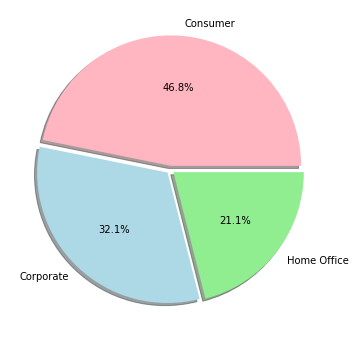

In [26]:
plt.figure(figsize = (6,6))
label = segment_plot['Segment'].unique()
plt.pie(segment_plot['Profit'], 
       autopct = '%1.1f%%',
       explode = (0.03,0.03,0.03),
       shadow = True,
       labels = label ,
       colors = color);

Consumer segment have higher contribution in total profit.

In [27]:
category_plot = data.groupby('Category').sum().reset_index()
category_plot

,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,118196026,741999.7953,8028,368.89,18451.2728
1,Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
2,Technology,102603754,836154.0330,6939,244.40,145454.9481


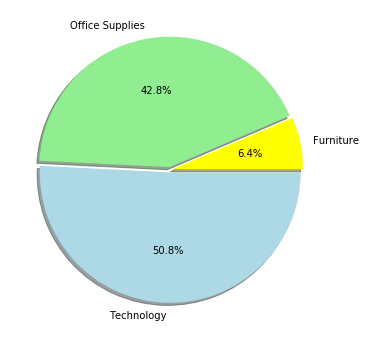

In [28]:
plt.figure(figsize = (6,6))
color = ('Yellow' , "LightGreen" , 'LightBlue')
label = category_plot["Category"].unique()

plt.pie(category_plot['Profit'],
       autopct = '%1.1f%%',
       explode = (0.02,0.02,0.02),
       shadow = True ,
       labels = label,
       colors = color);

Among all the categories `Furniture` has comparatively lower contribution in total profit

# Geospatial Information
here we mark top three customer sharing state of USA which are : 
* California 
* New York
* Texas 


In [1]:
from branca.element import Figure
import folium

In [7]:
# setting base map 
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[44.500000, -89.500000],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)

#marking the locations 
folium.Marker(location=[36.778259, -119.417931],popup='<strong>Highest frequency Share</strong>',tooltip='Click here to see Popup').add_to(m3)
folium.Marker(location=[40.730610, -73.935242],popup='<strong>Second Highest</strong>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[31.000000, -100.000000],popup='<strong>Third Highest</strong>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)

m3

 